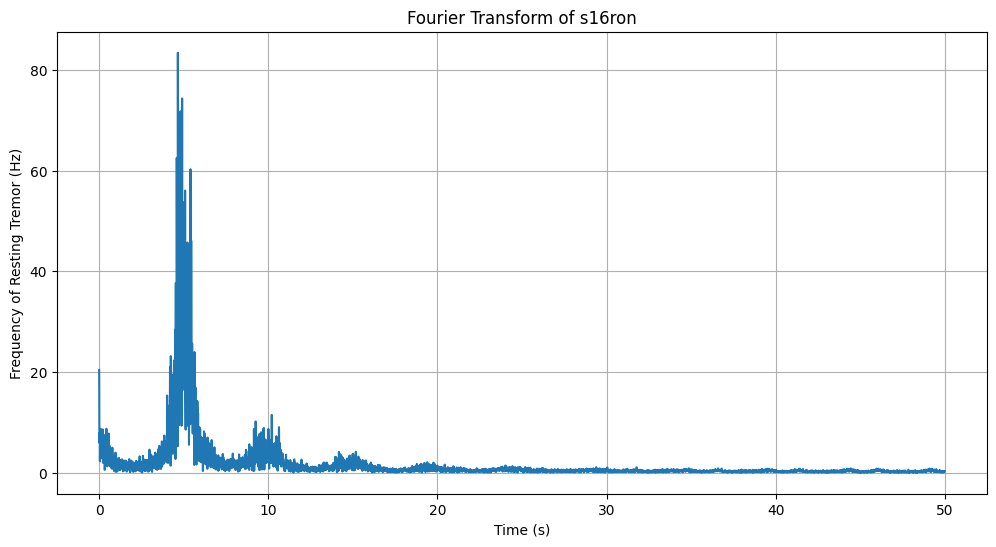

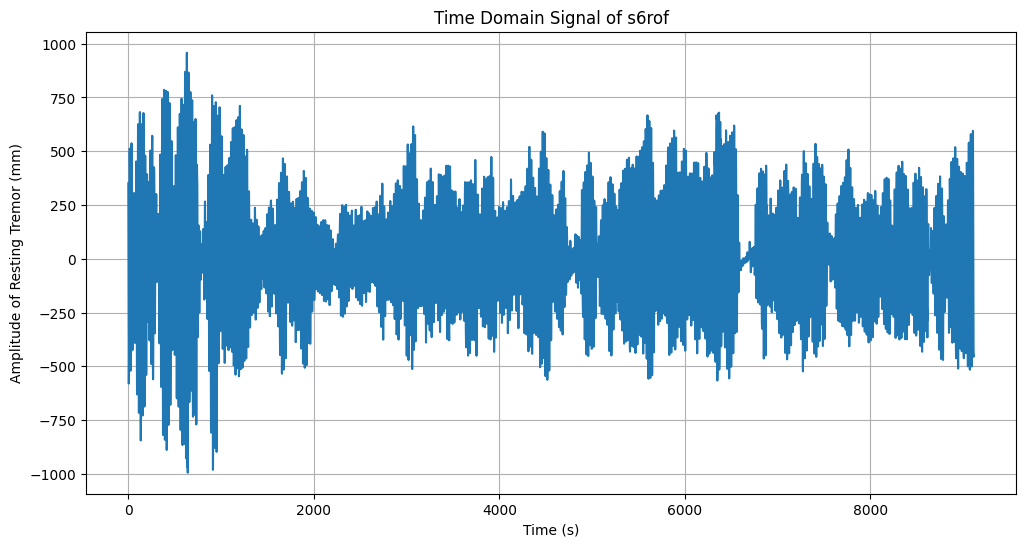

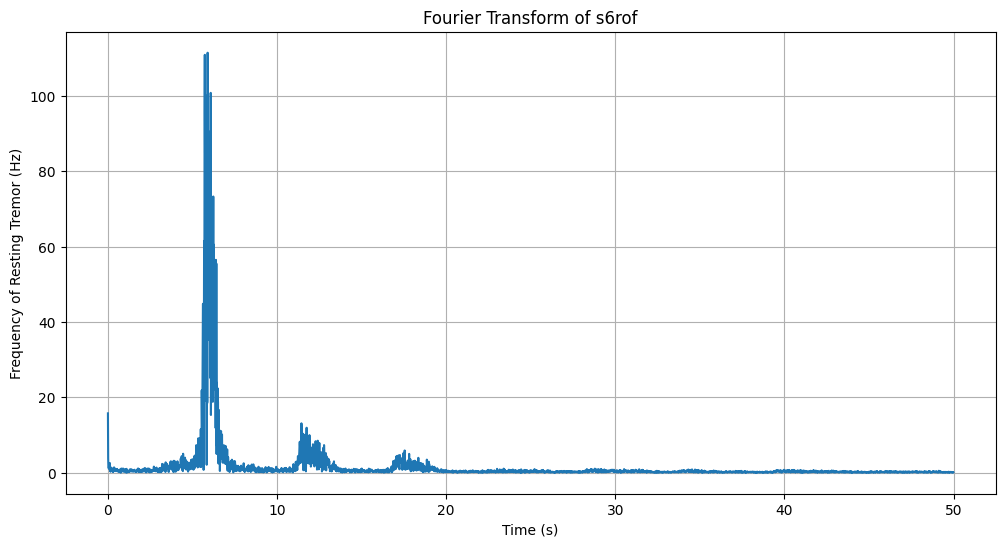

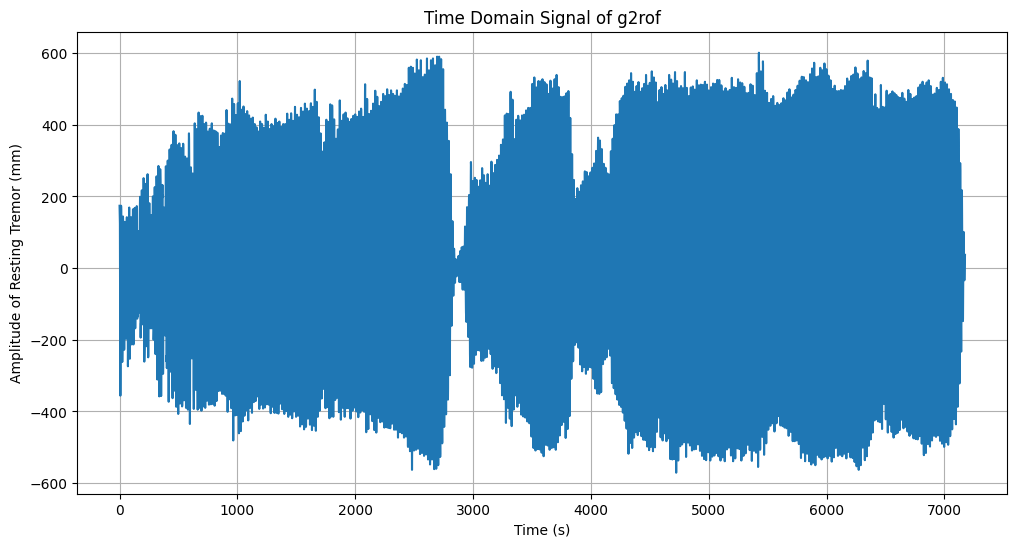

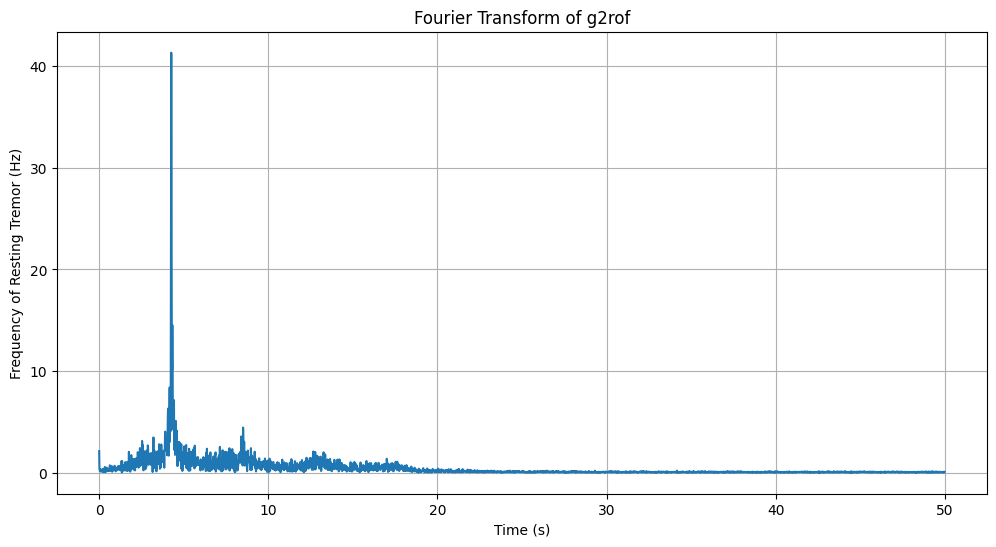

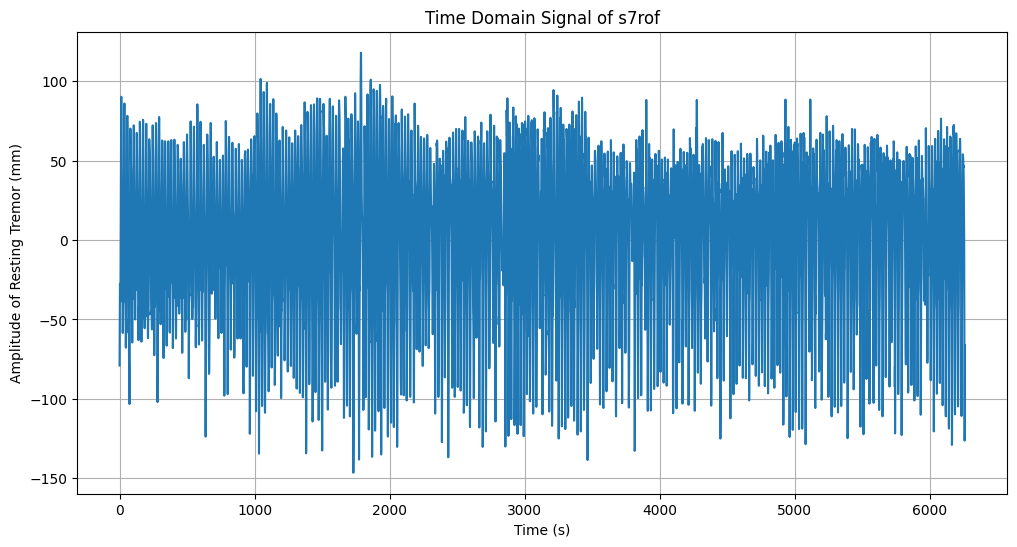

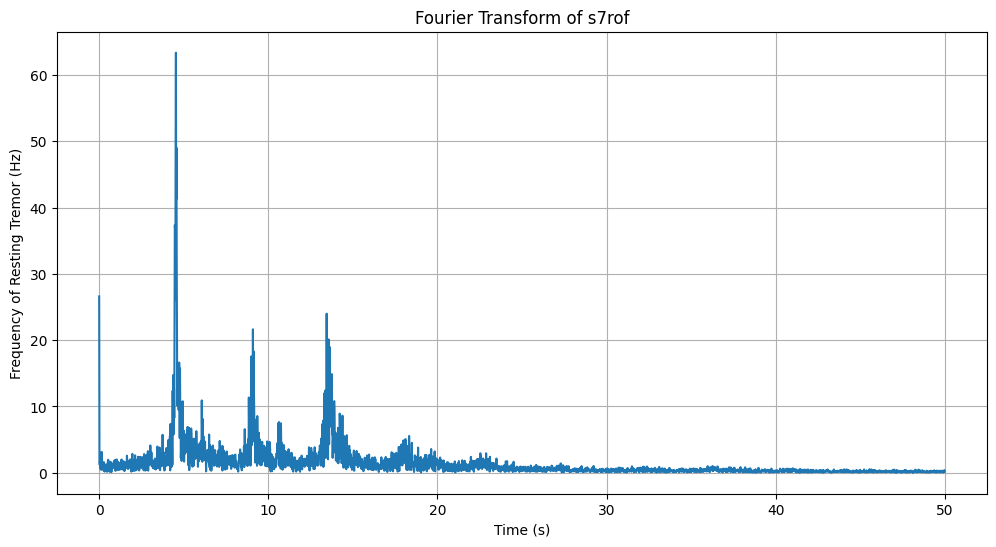

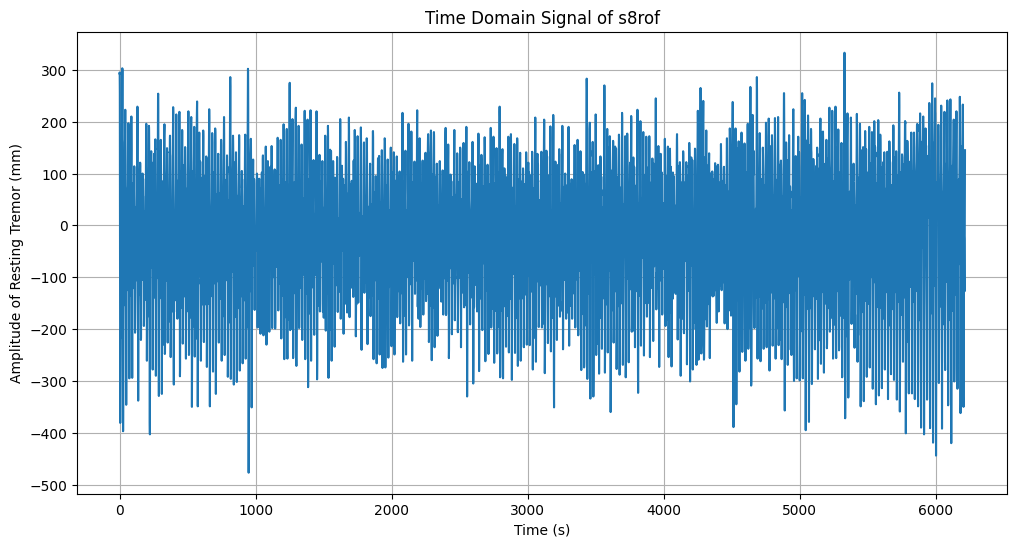

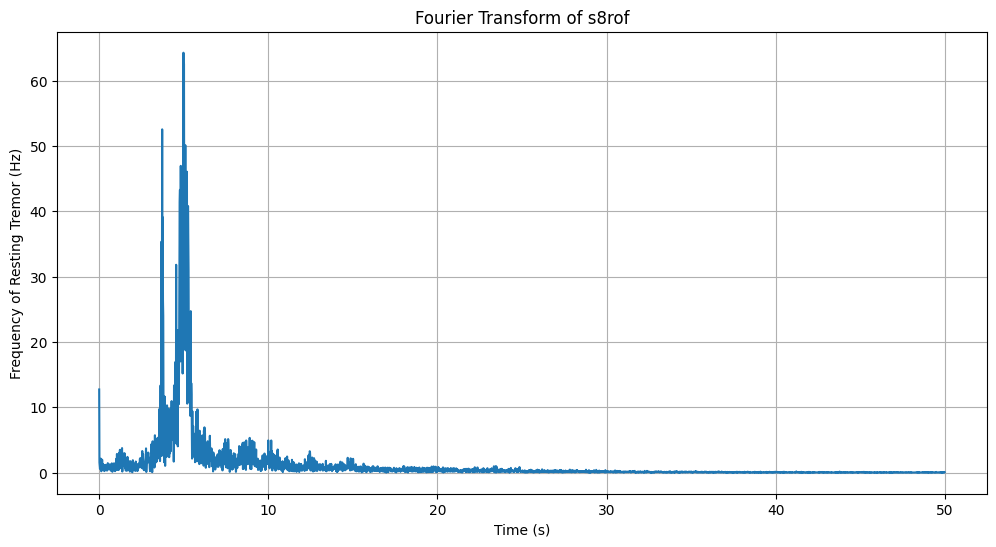

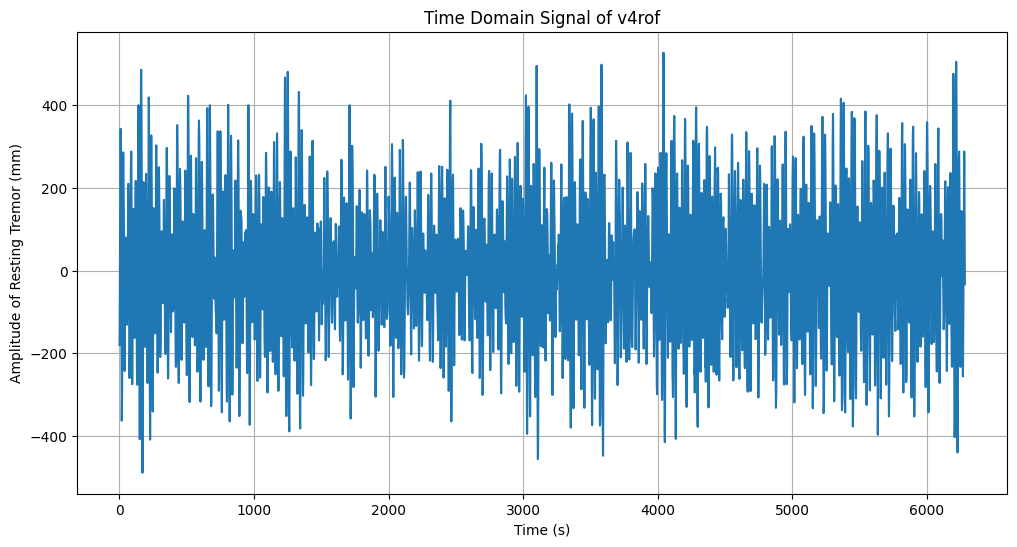

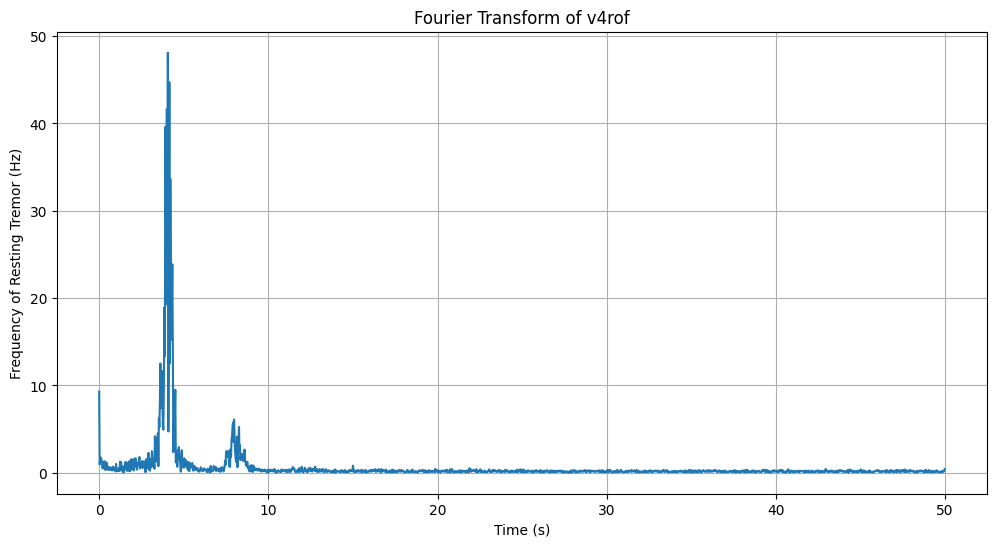

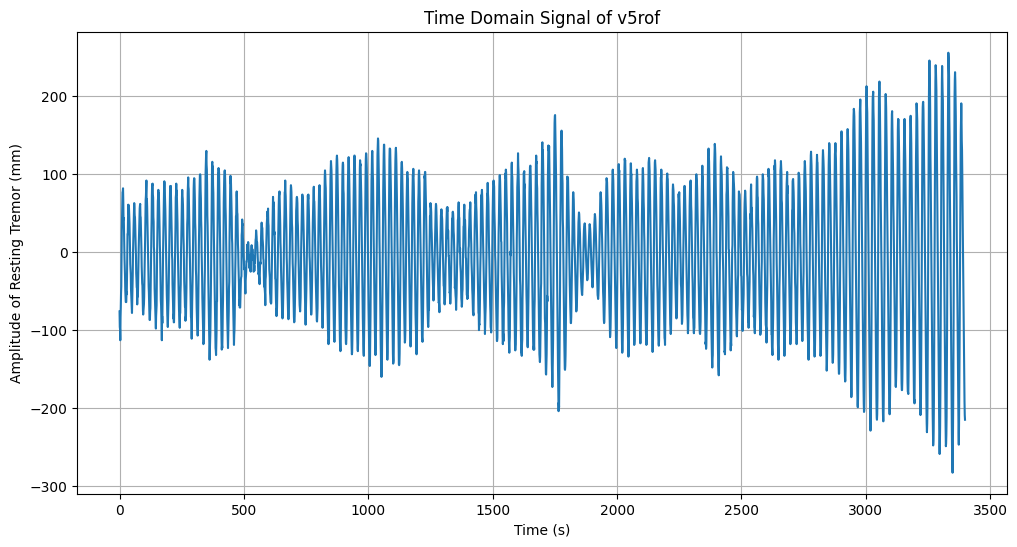

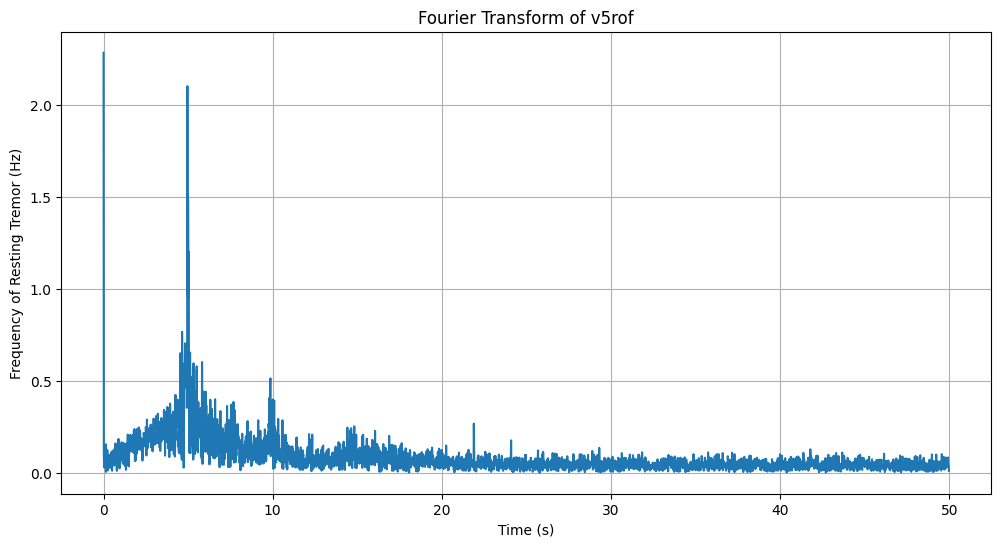

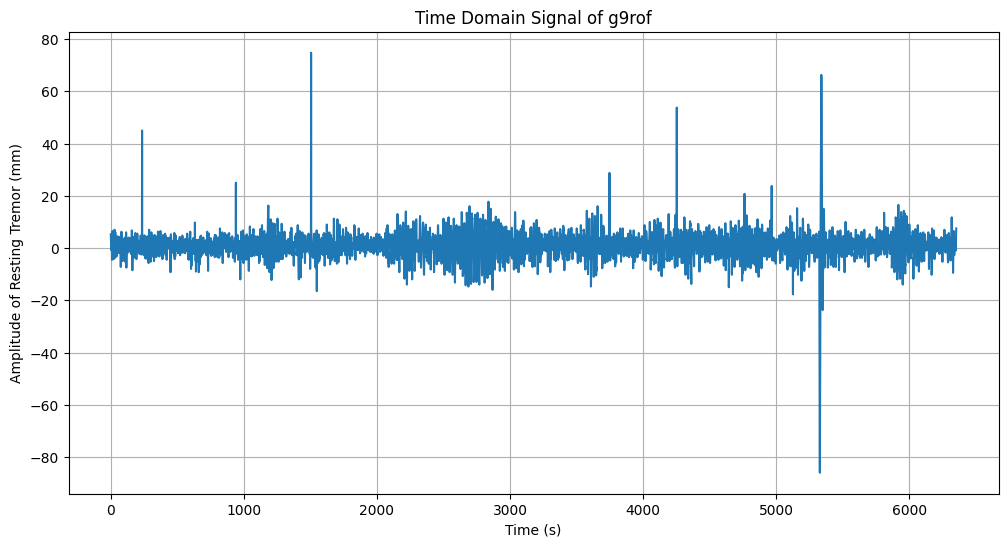

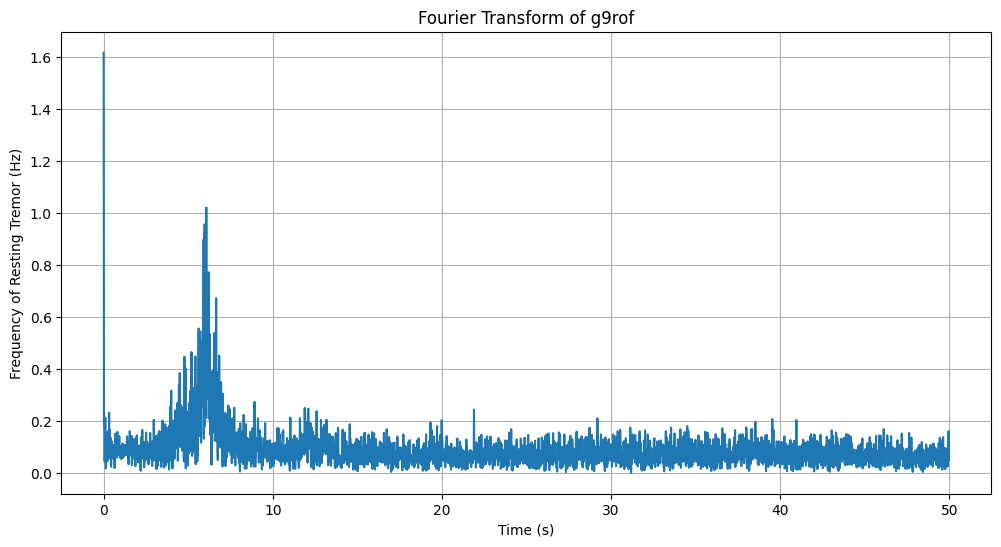

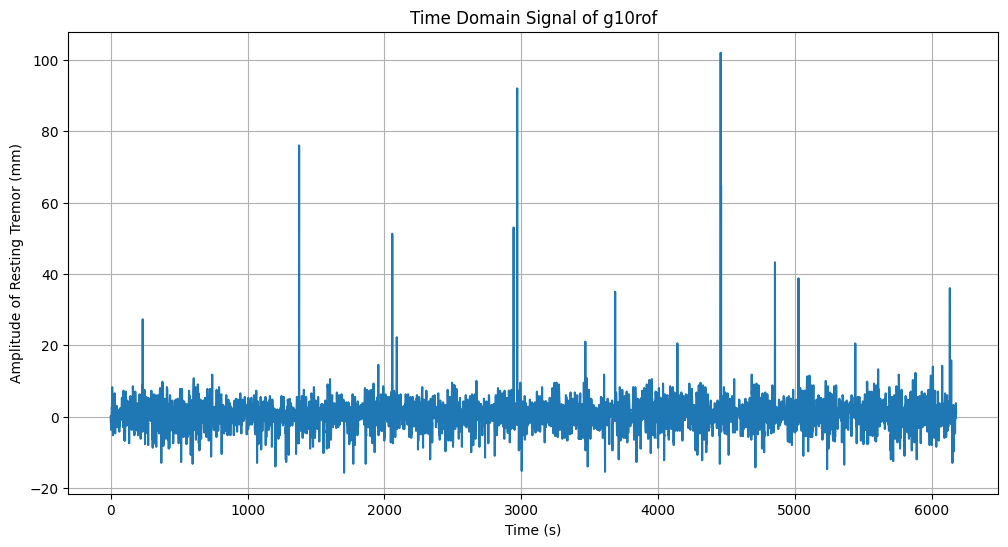

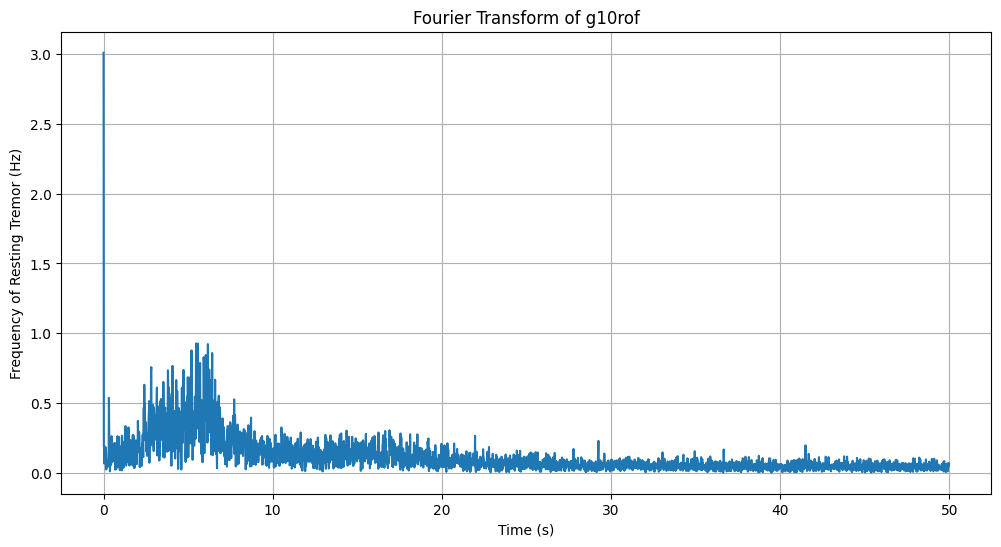

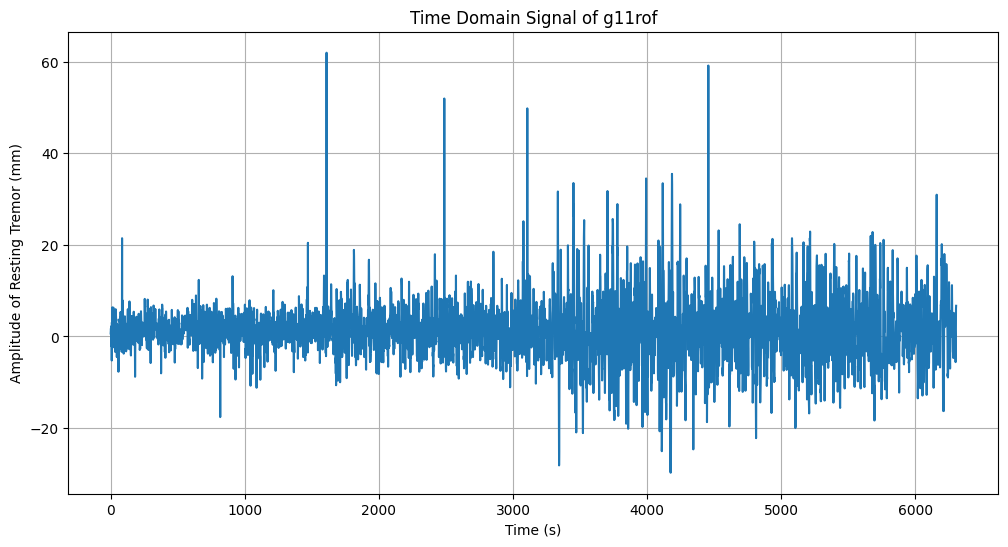

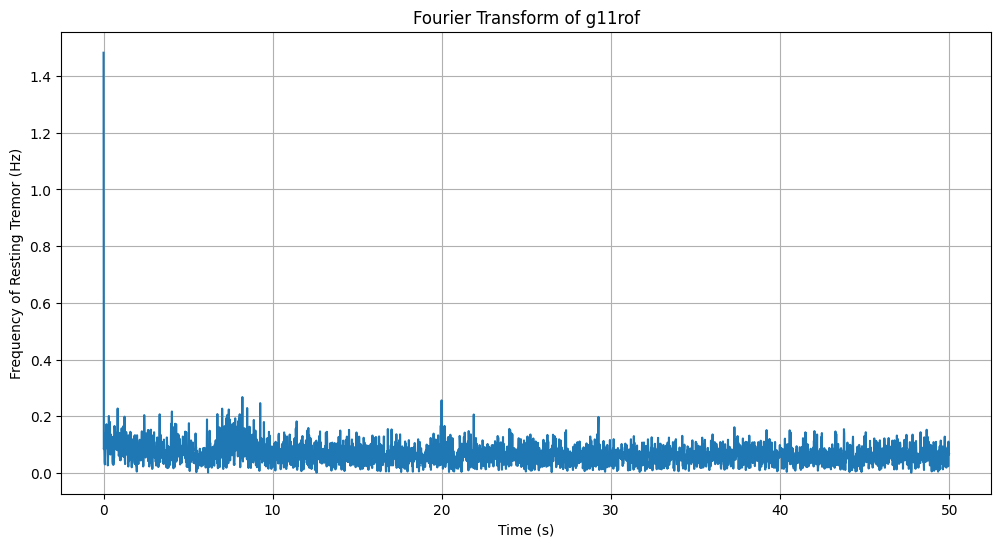

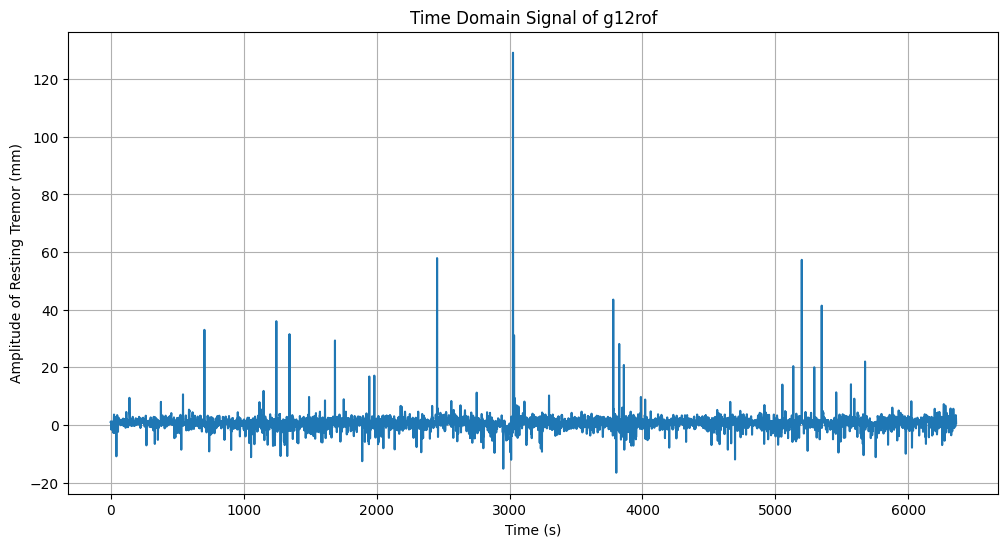

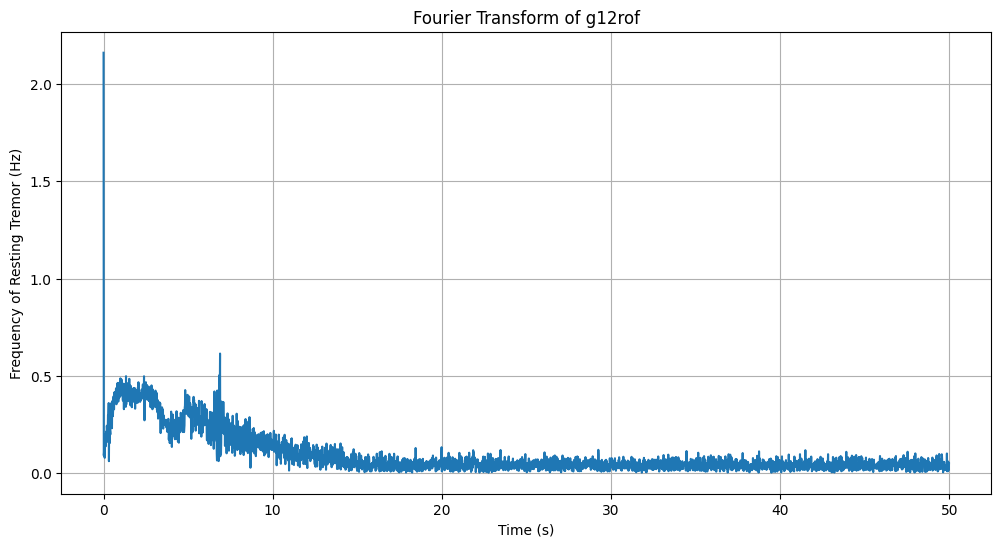

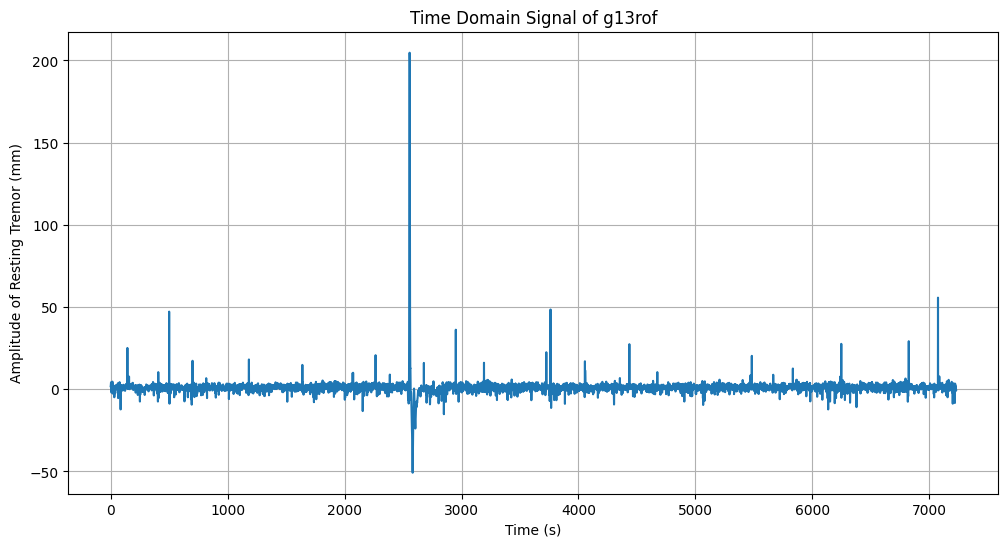

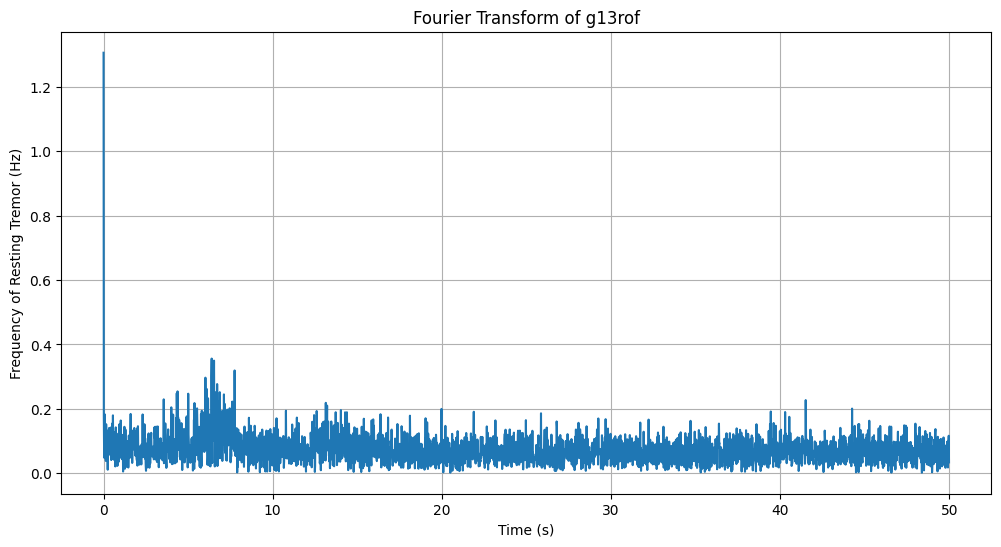

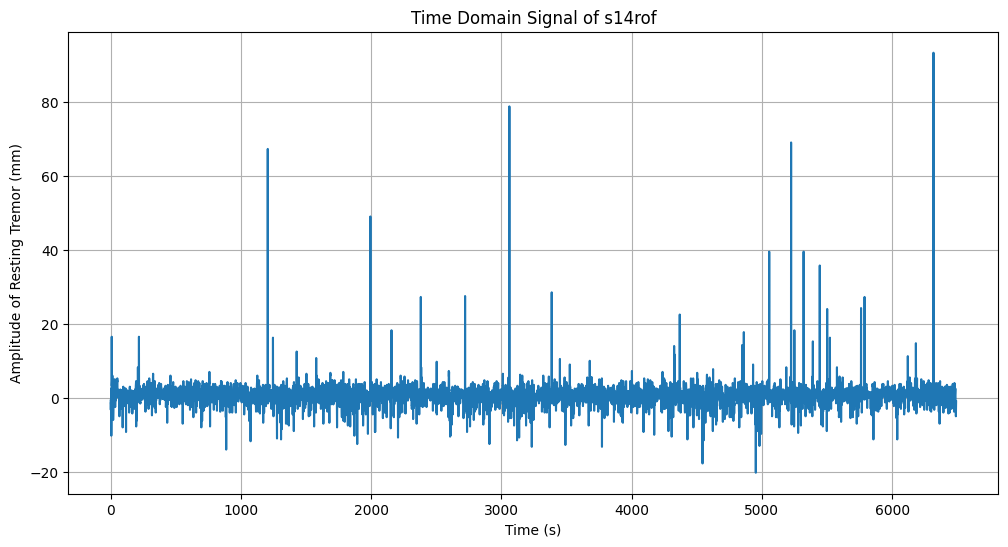

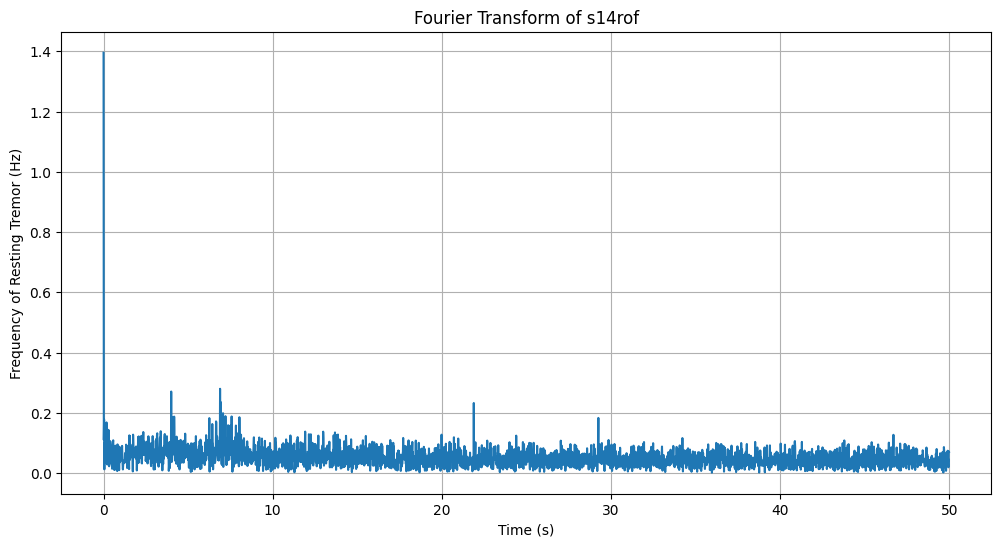

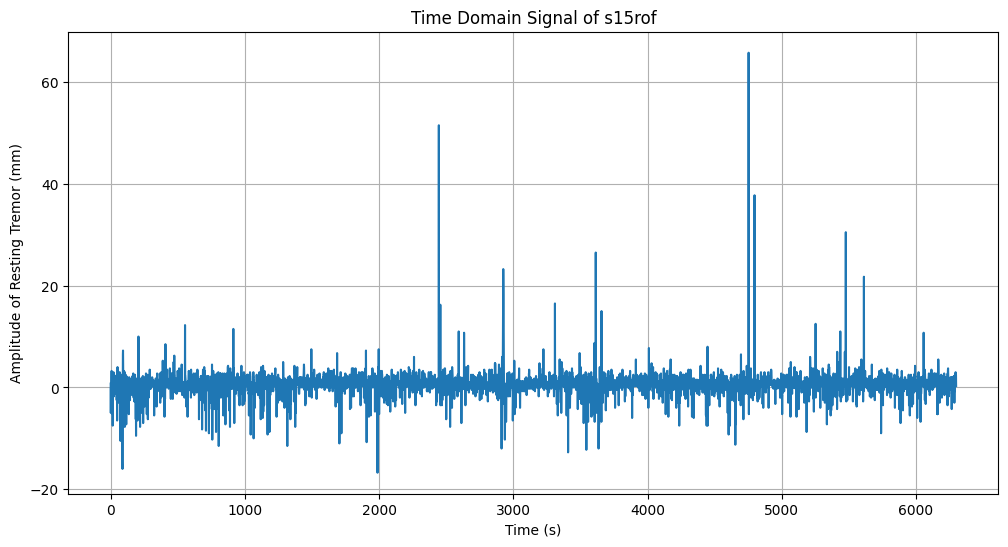

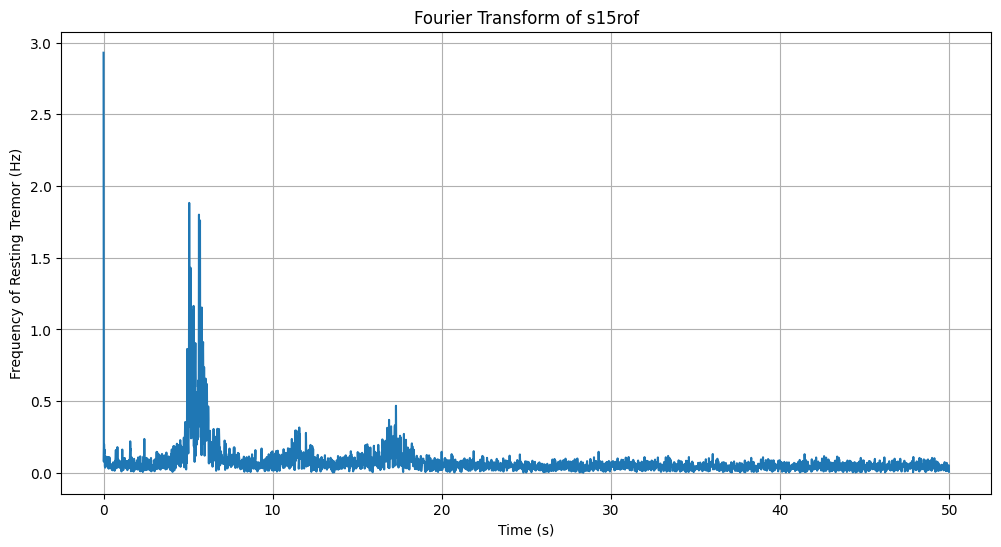

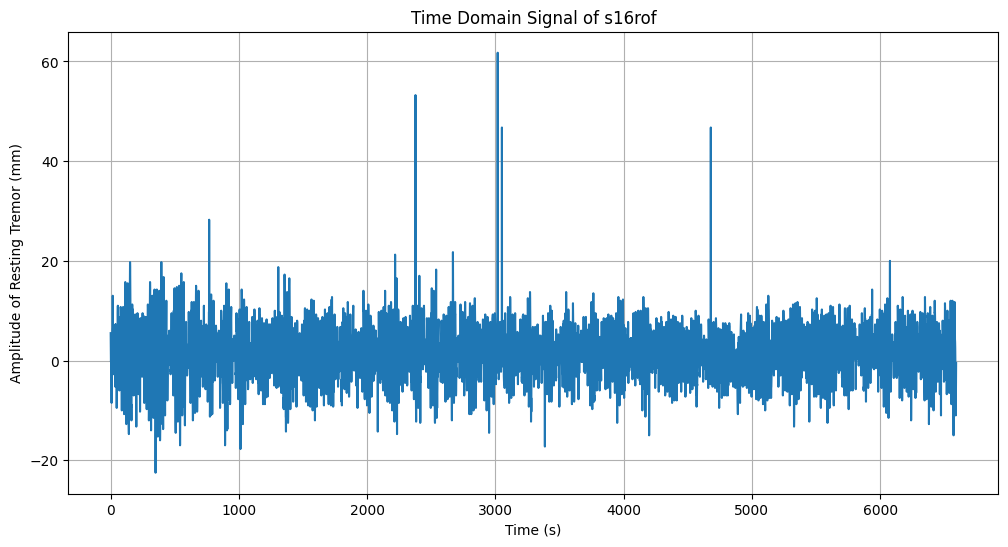

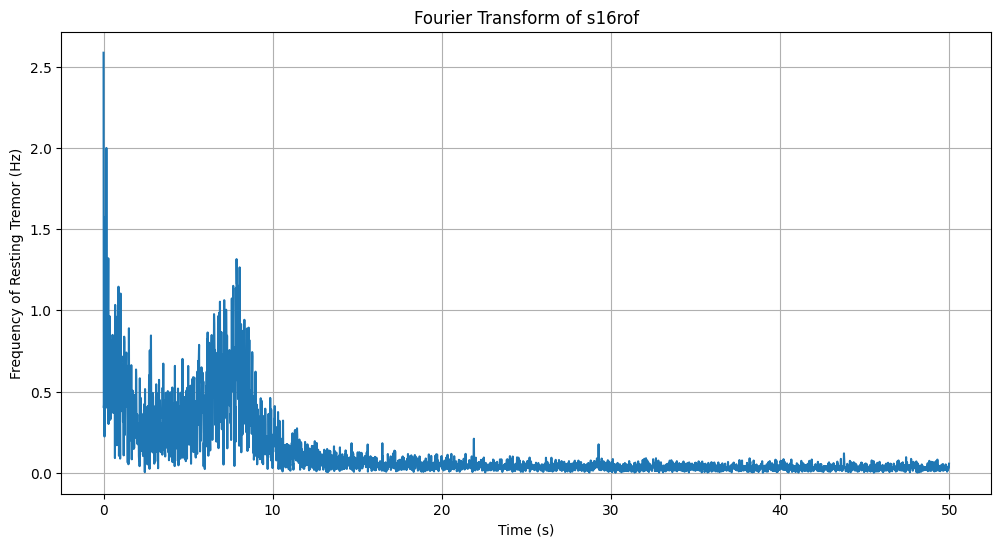

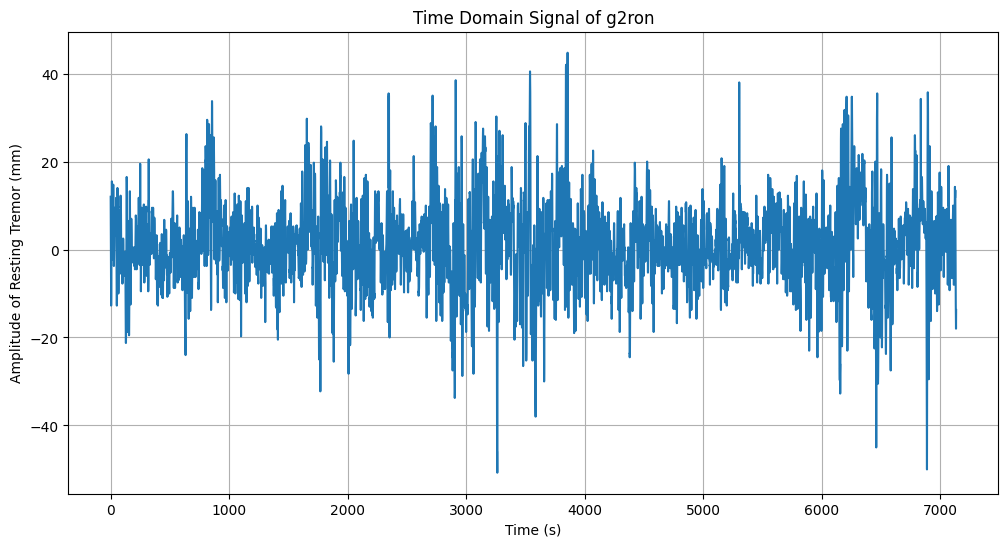

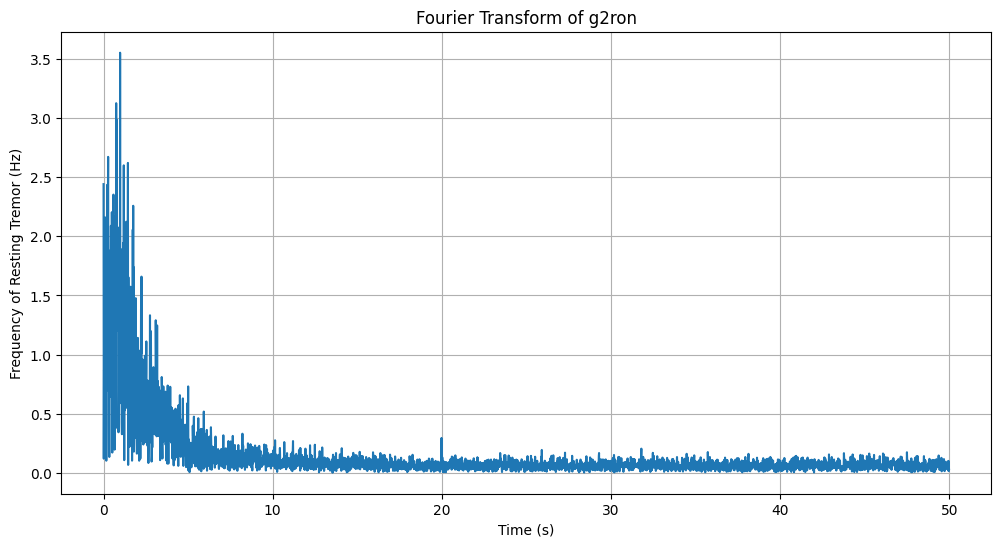

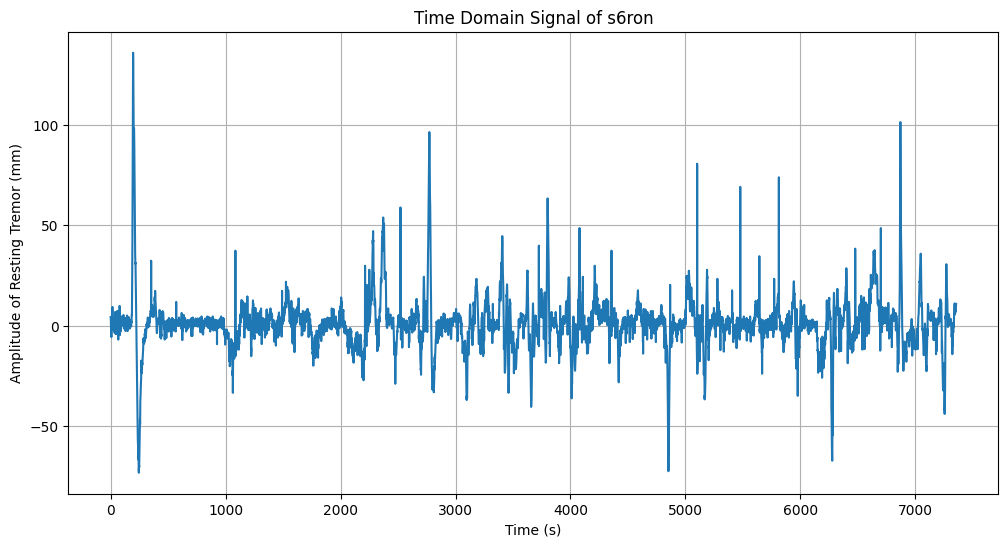

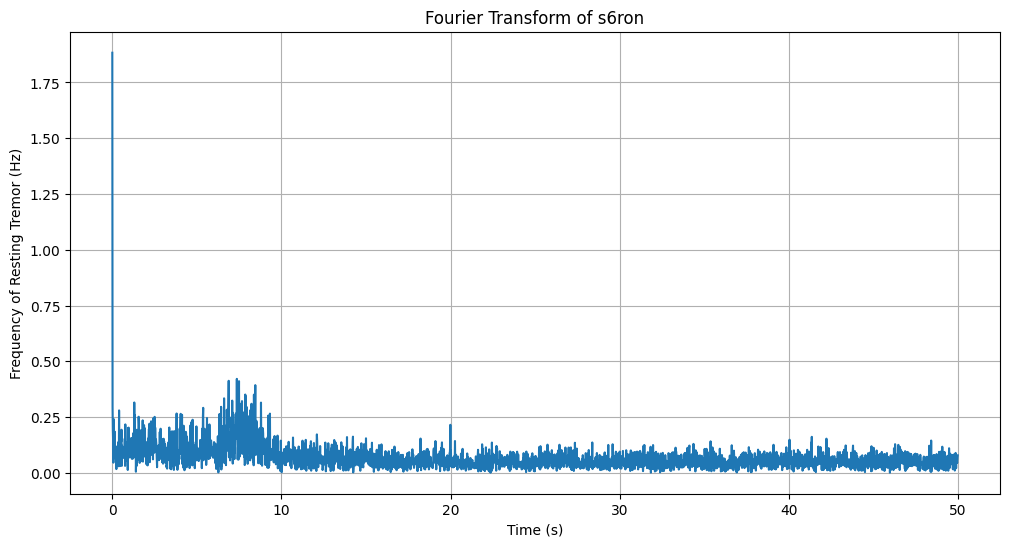

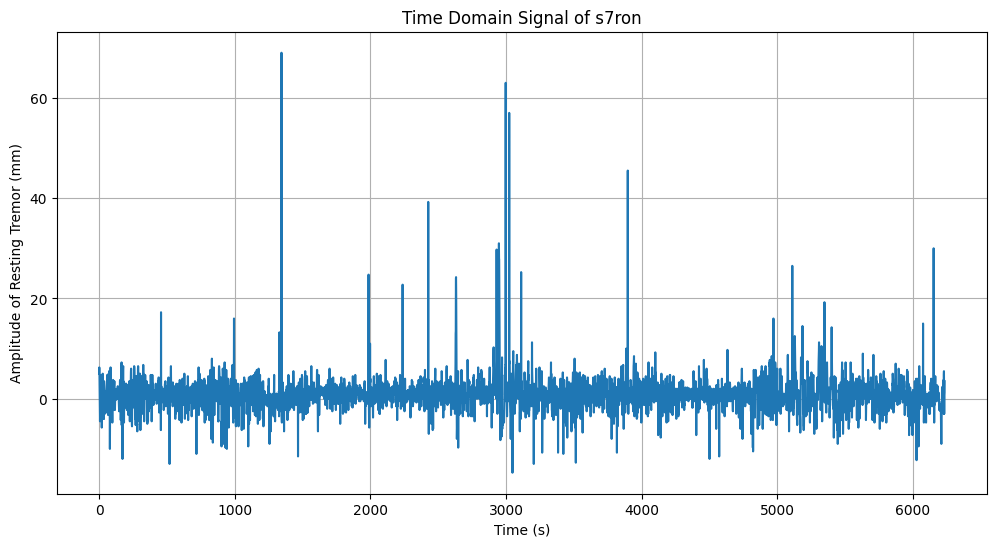

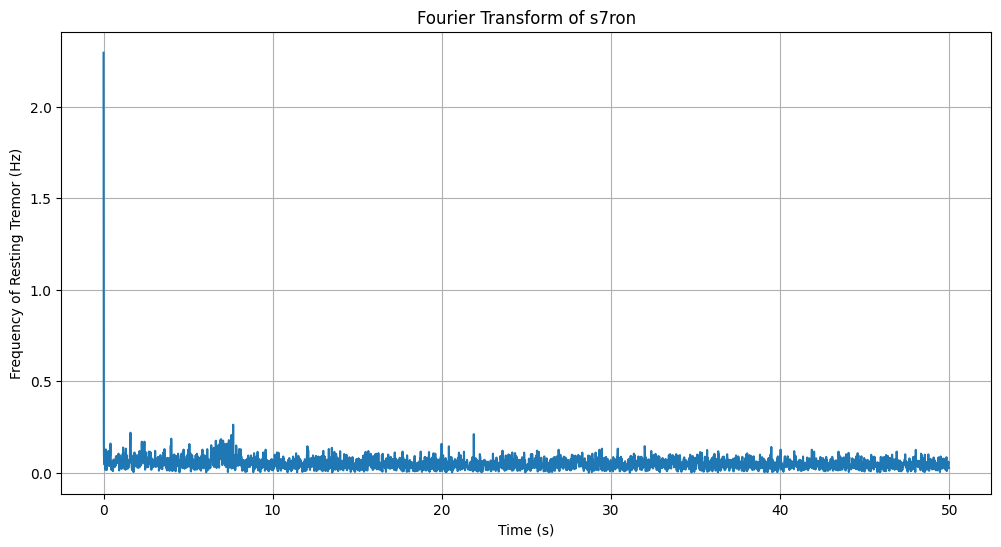

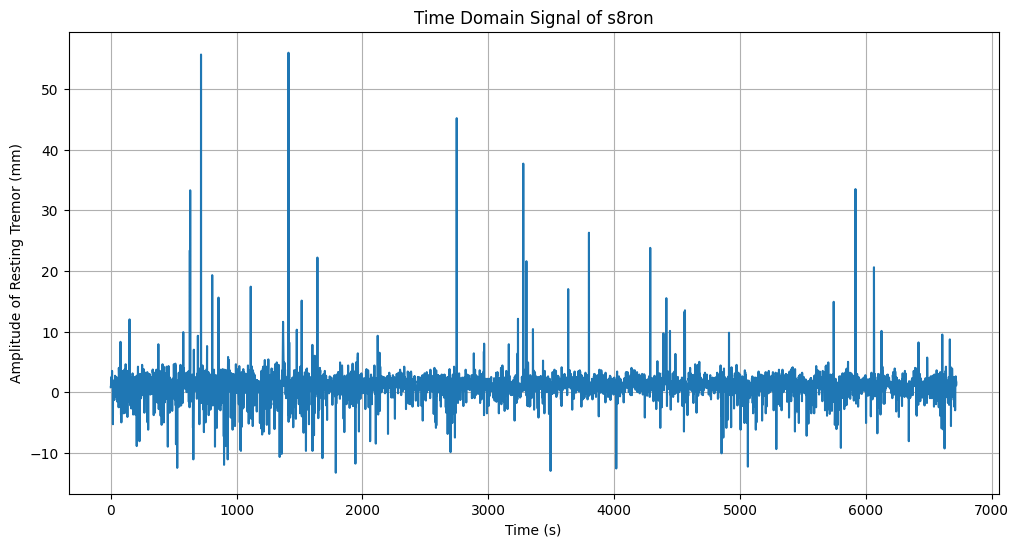

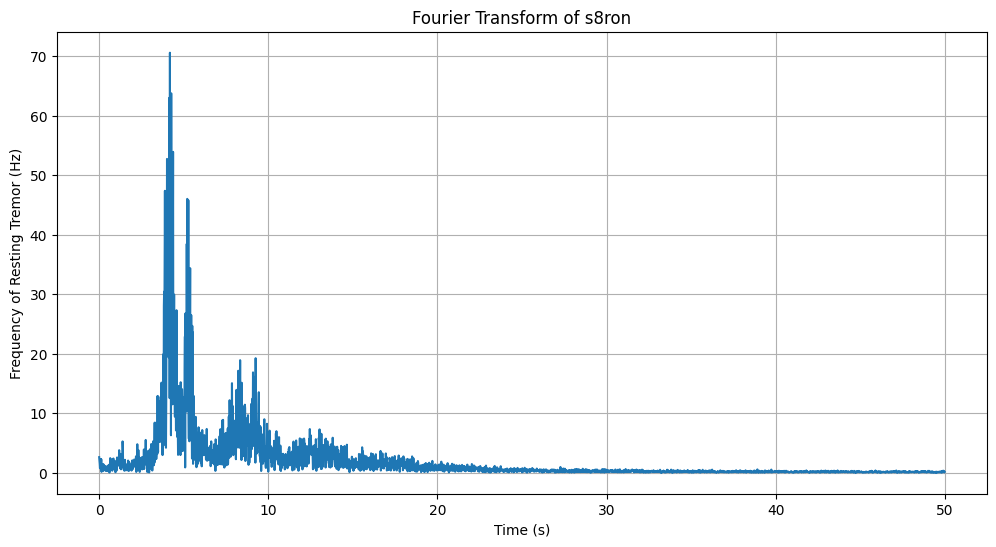

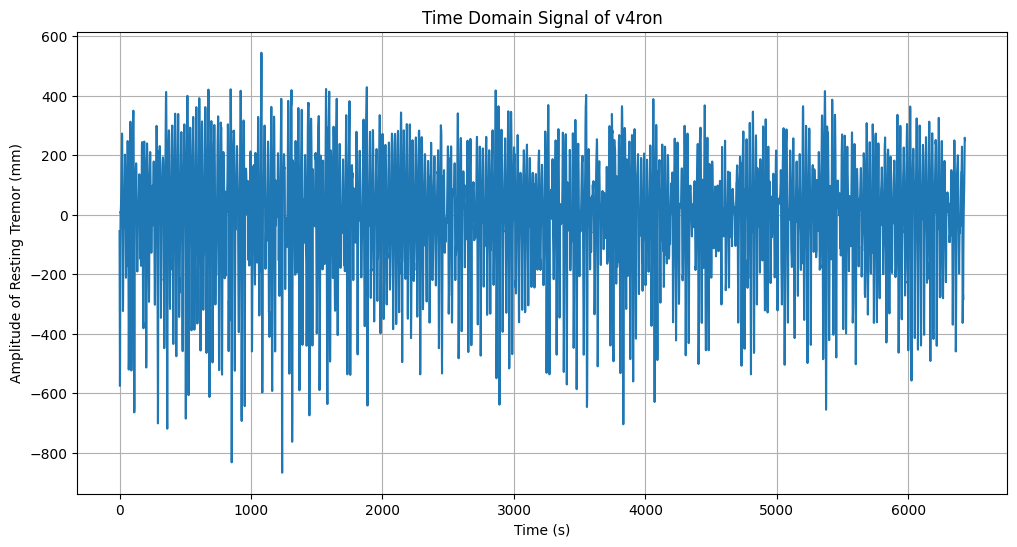

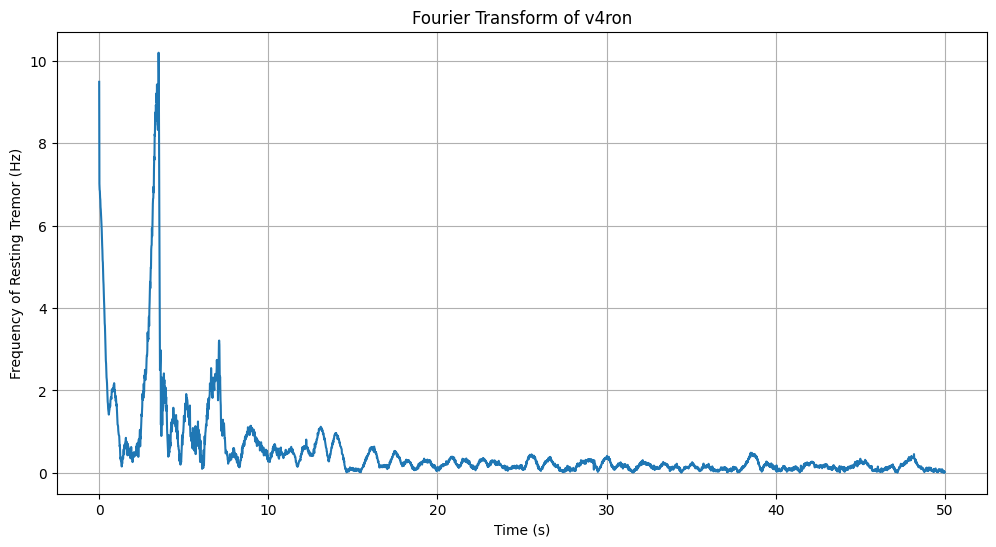

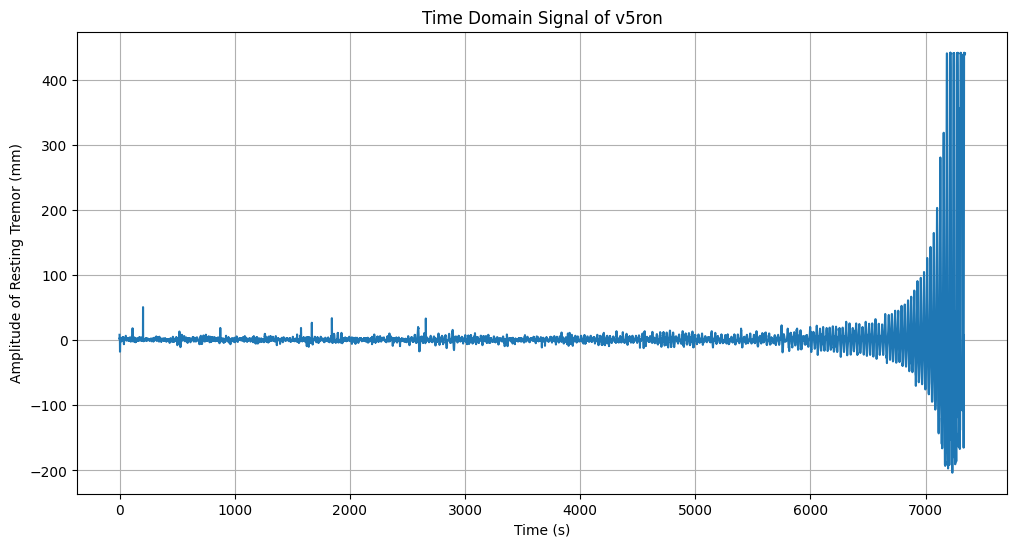

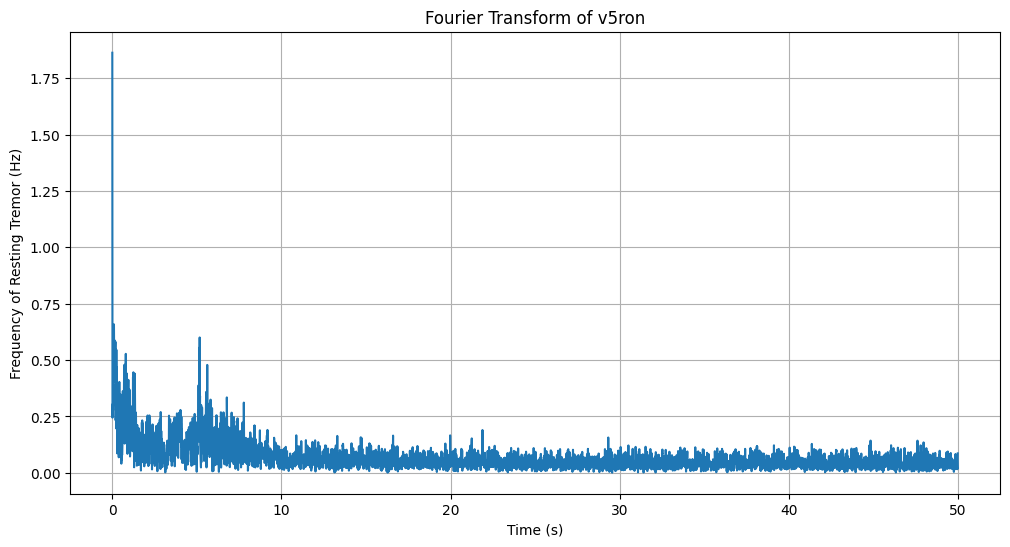

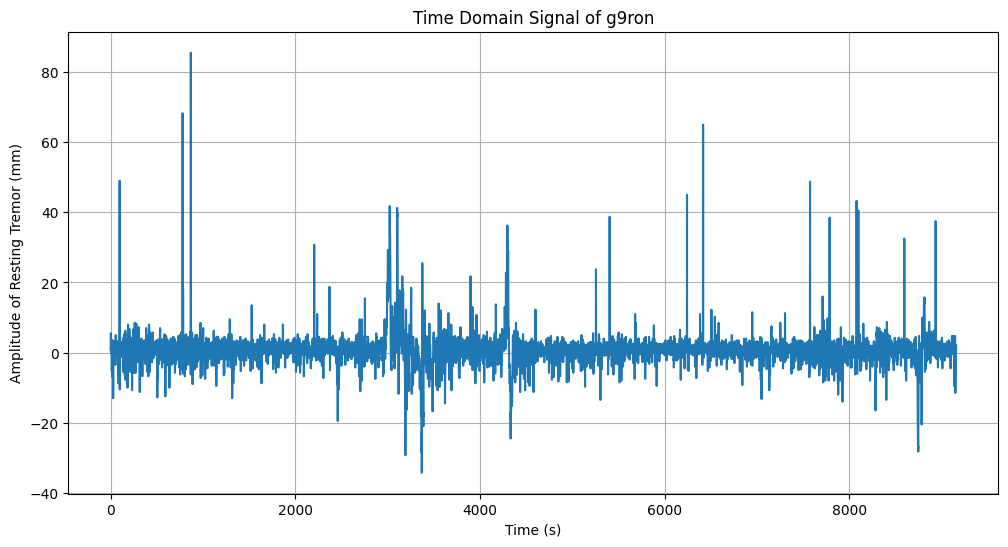

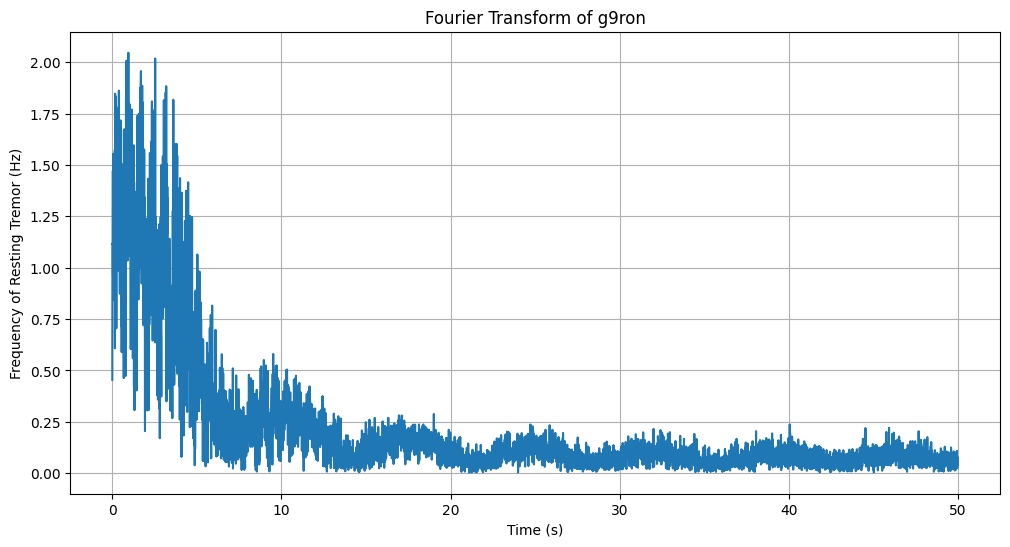

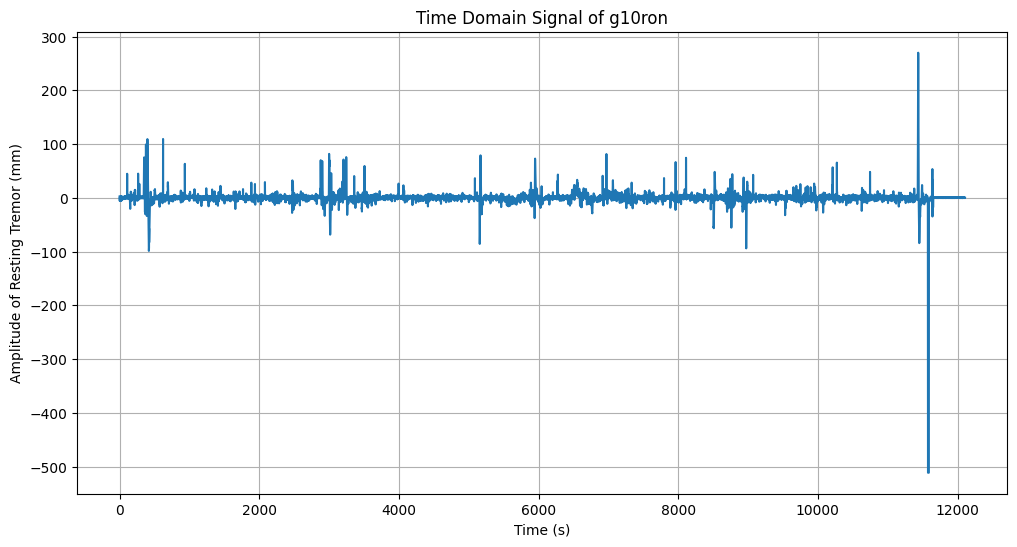

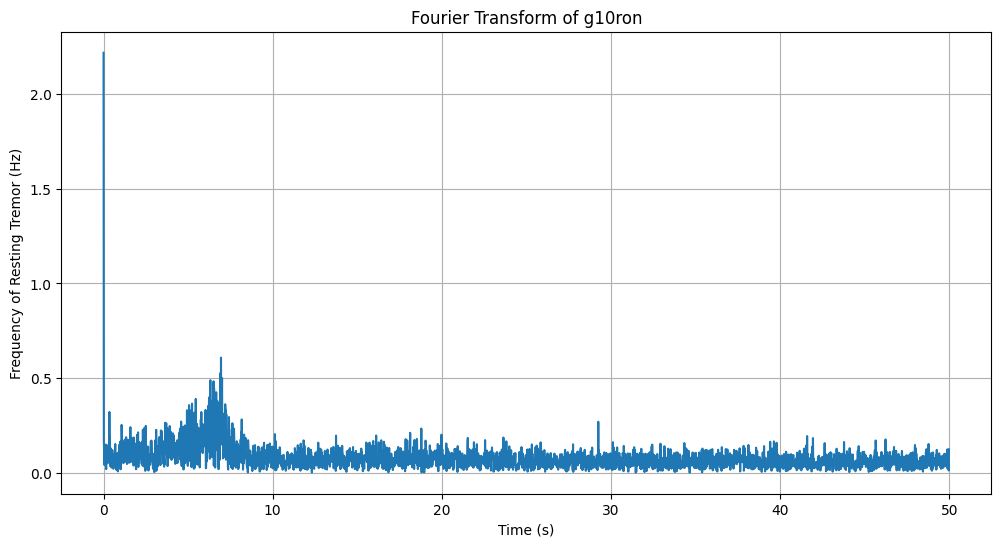

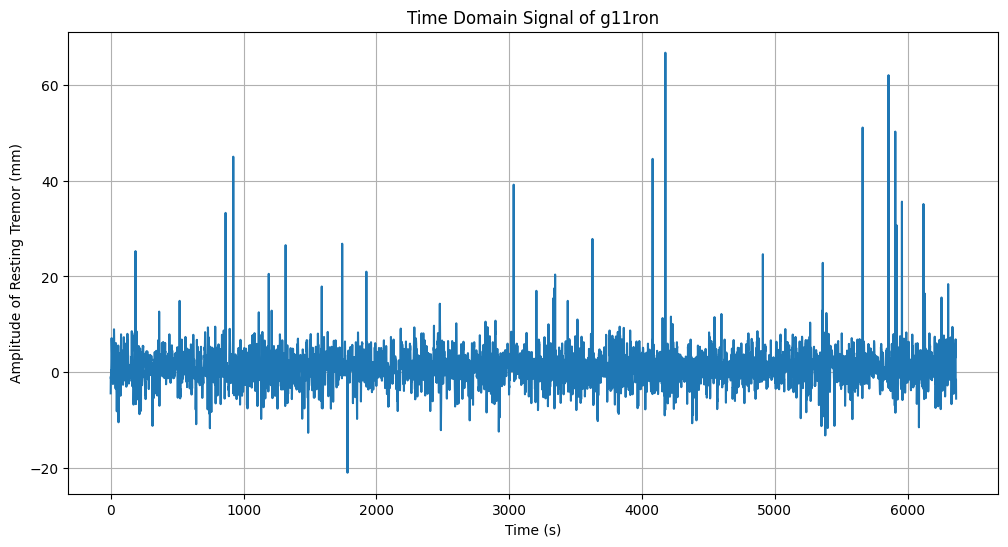

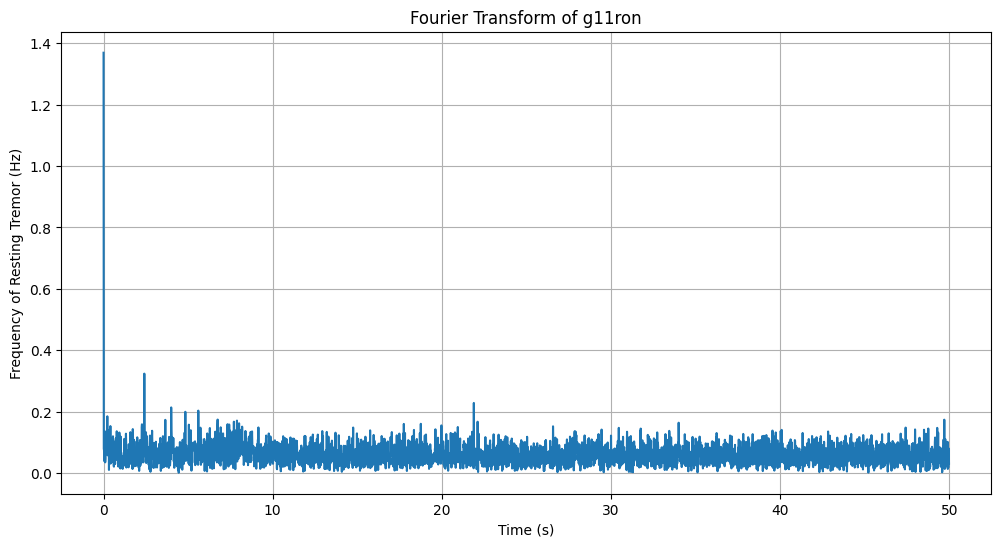

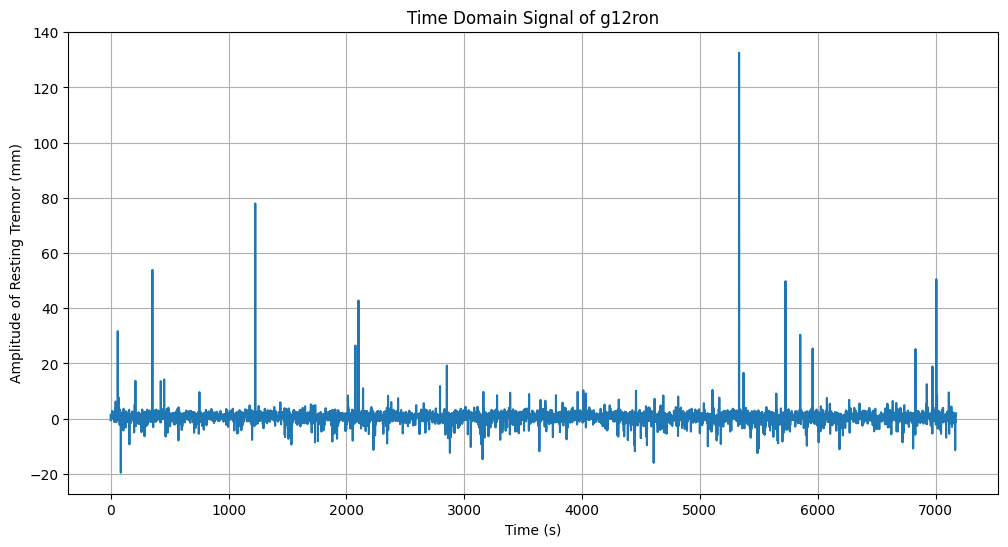

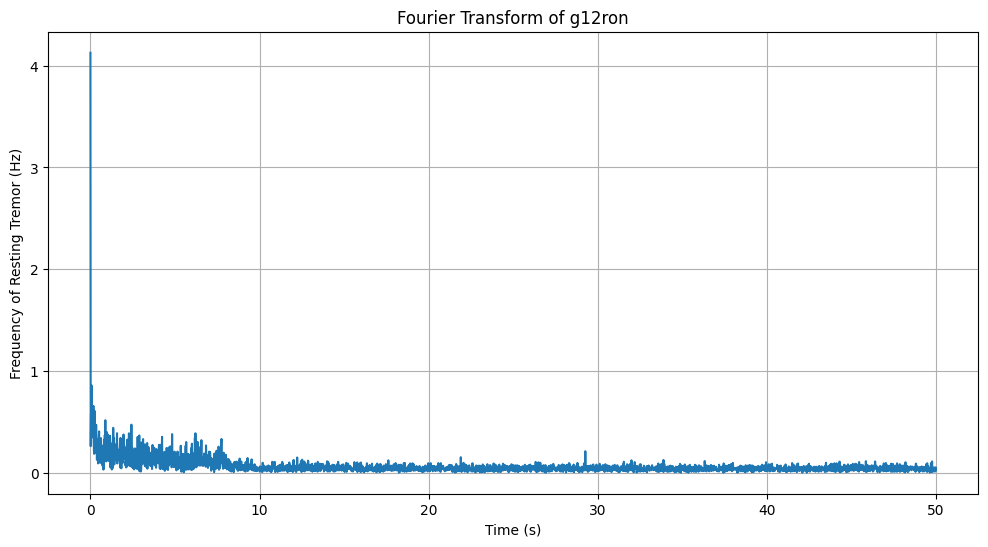

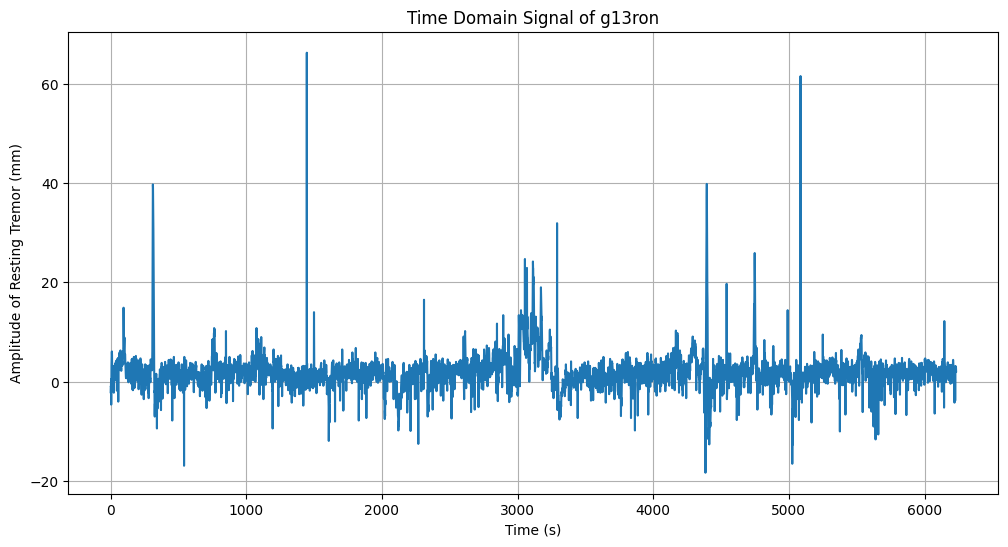

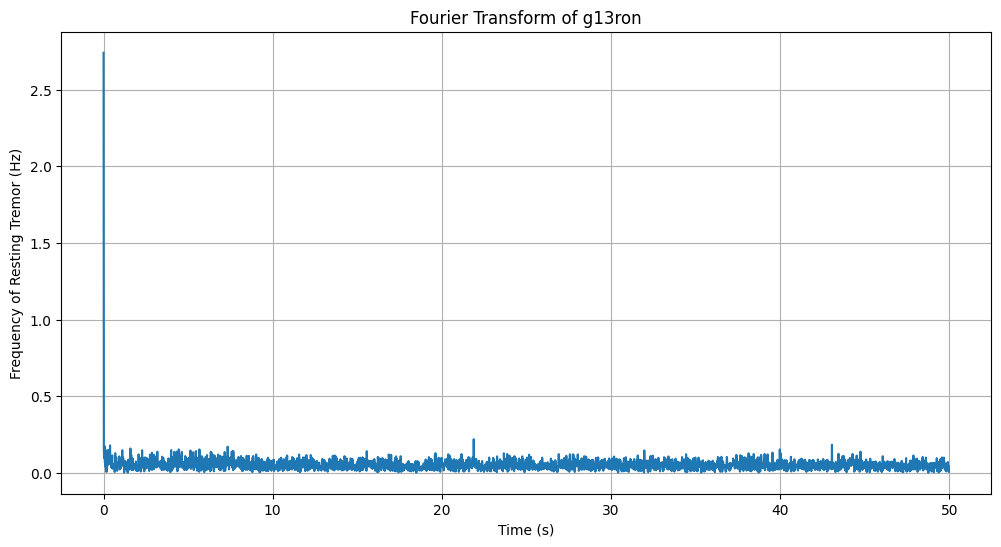

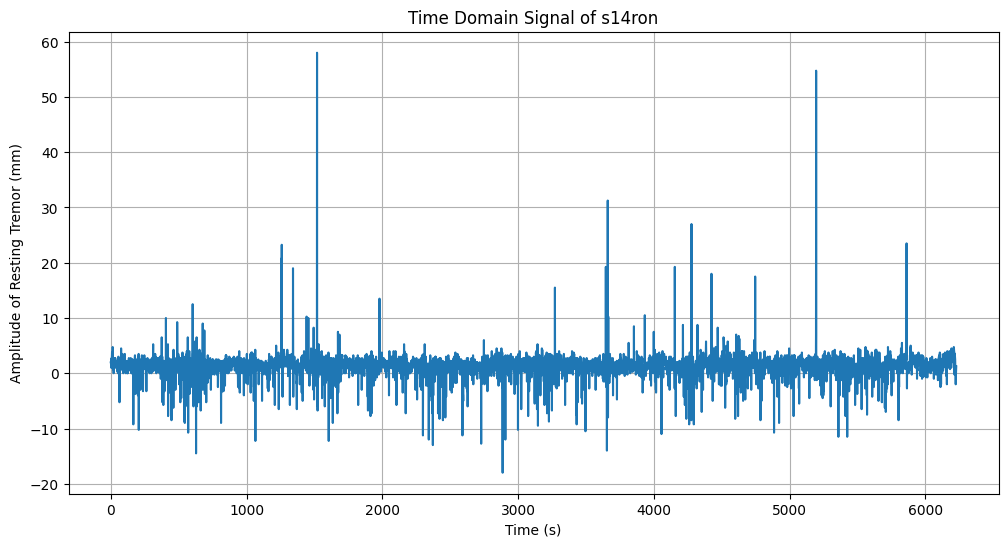

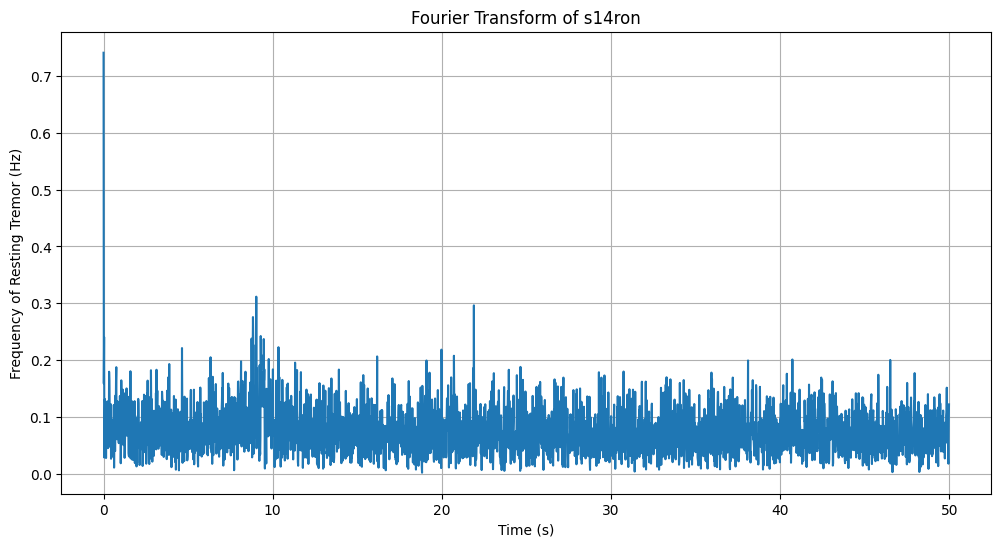

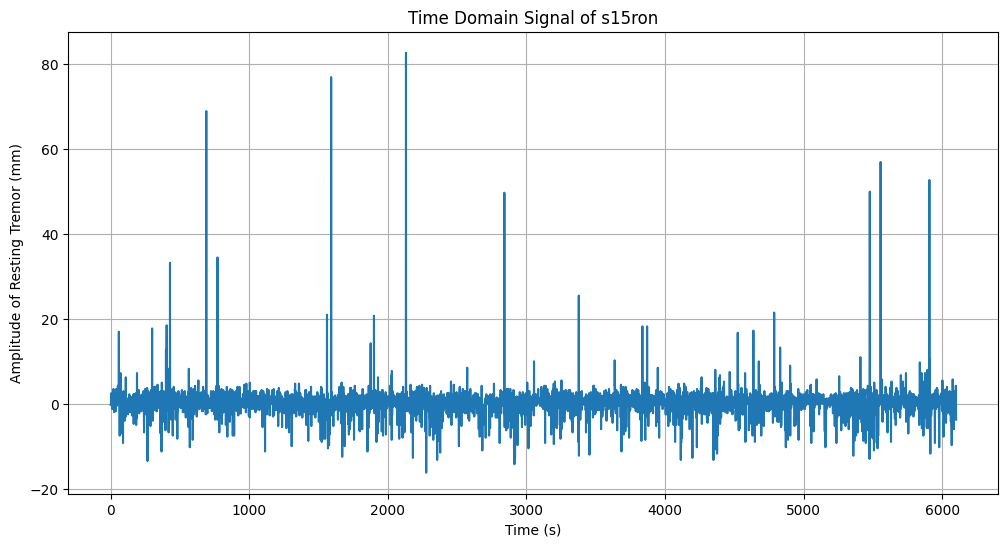

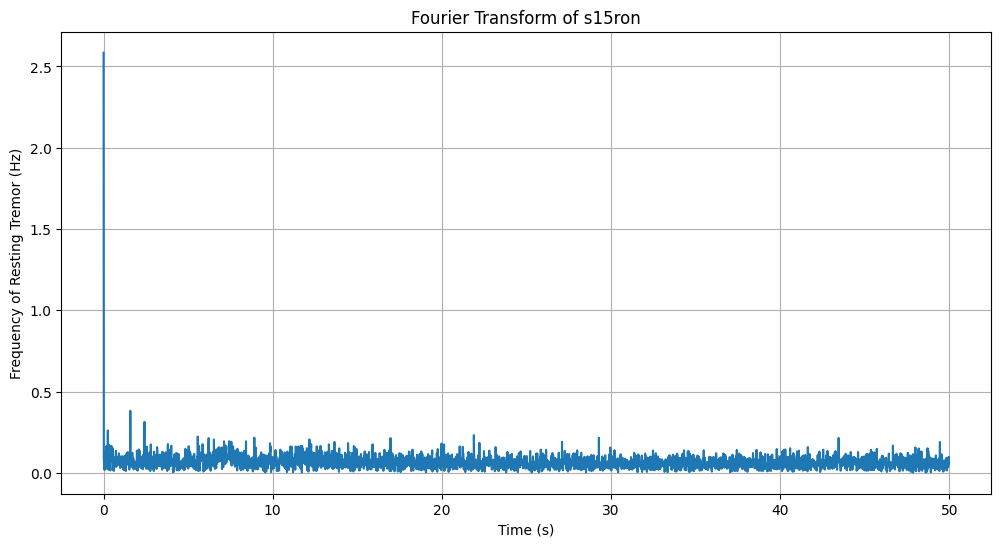

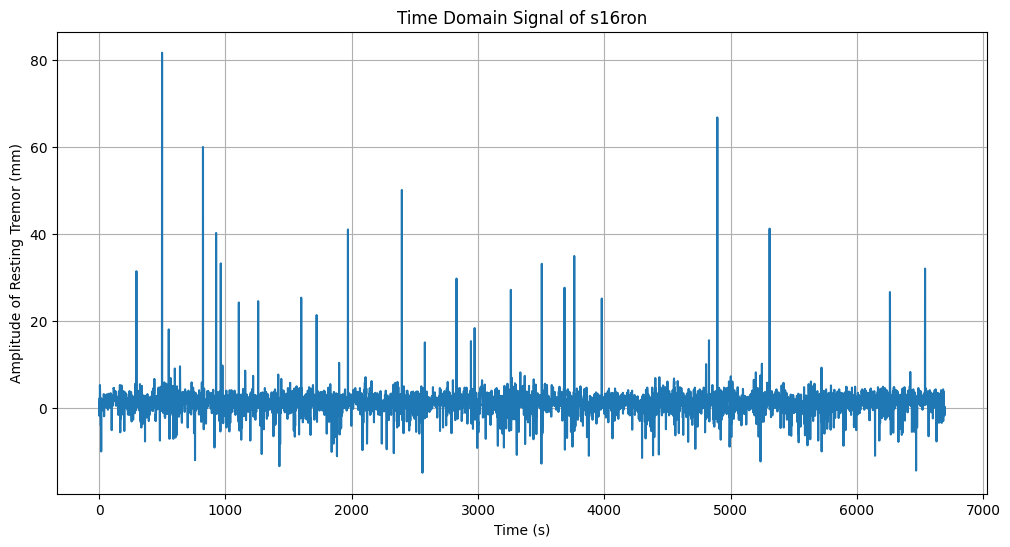

Results saved to average_results.csv


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import os

# Conversion factor from m/s to mm/s
MS_TO_MMS = 1000

def convert_velocity(ndarray, unit):
    if unit == 'm/s':
        return ndarray * MS_TO_MMS
    return ndarray

def process_csv(file_path, unit, sampling_rate):
    # read in
    data = pd.read_csv(file_path, header=None)

    ndarray = data.to_numpy().flatten()

    # Convert velocity
    ndarray = convert_velocity(ndarray, unit)

    #FFT
    N = len(ndarray)
    T = 1.0 / sampling_rate  # Sampling interval
    yf = fft(ndarray)
    xf = fftfreq(N, T)[:N//2]

    # Amplitude spectrum
    amplitude = 2.0/N * np.abs(yf[:N//2])

    # average amplitude and frequency
    average_amplitude = np.mean(amplitude)
    average_frequency = np.mean(xf)

    # results
    results = {
        'xf': xf,
        'amplitude': amplitude,
        'ndarray': ndarray,
        'average_amplitude': average_amplitude,
        'average_frequency': average_frequency
    }

    return results

# List of file paths with corresponding metadata
files_metadata = [
    {'file_path': 'C:/Users/ksoha/OneDrive/Documents/GitHub/collegecourses/pioneer/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/rofh/s6rof.csv', 'unit': 'm/s', 'sampling_rate': 100},
    {'file_path': 'C:/Users/ksoha/OneDrive/Documents/GitHub/collegecourses/pioneer/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/rofh/g2rof.csv', 'unit': 'm/s', 'sampling_rate': 100},
    {'file_path': 'C:/Users/ksoha/OneDrive/Documents/GitHub/collegecourses/pioneer/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/rofh/s7rof.csv', 'unit': 'mm/s', 'sampling_rate': 100},
    {'file_path': 'C:/Users/ksoha/OneDrive/Documents/GitHub/collegecourses/pioneer/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/rofh/s8rof.csv', 'unit': 'm/s', 'sampling_rate': 100},
    {'file_path': 'C:/Users/ksoha/OneDrive/Documents/GitHub/collegecourses/pioneer/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/rofh/v4rof.csv', 'unit': 'm/s', 'sampling_rate': 100},
    {'file_path': 'C:/Users/ksoha/OneDrive/Documents/GitHub/collegecourses/pioneer/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/rofh/v5rof.csv', 'unit': 'm/s', 'sampling_rate': 100},
    {'file_path': 'C:/Users/ksoha/OneDrive/Documents/GitHub/collegecourses/pioneer/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/rofl/g9rof.csv', 'unit': 'mm/s', 'sampling_rate': 100},
    {'file_path': 'C:/Users/ksoha/OneDrive/Documents/GitHub/collegecourses/pioneer/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/rofl/g10rof.csv', 'unit': 'mm/s', 'sampling_rate': 100},
    {'file_path': 'C:/Users/ksoha/OneDrive/Documents/GitHub/collegecourses/pioneer/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/rofl/g11rof.csv', 'unit': 'mm/s', 'sampling_rate': 100},
    {'file_path': 'C:/Users/ksoha/OneDrive/Documents/GitHub/collegecourses/pioneer/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/rofl/g12rof.csv', 'unit': 'mm/s', 'sampling_rate': 100},
    {'file_path': 'C:/Users/ksoha/OneDrive/Documents/GitHub/collegecourses/pioneer/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/rofl/g13rof.csv', 'unit': 'mm/s', 'sampling_rate': 100},
    {'file_path': 'C:/Users/ksoha/OneDrive/Documents/GitHub/collegecourses/pioneer/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/rofl/s14rof.csv', 'unit': 'mm/s', 'sampling_rate': 100},
    {'file_path': 'C:/Users/ksoha/OneDrive/Documents/GitHub/collegecourses/pioneer/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/rofl/s15rof.csv', 'unit': 'mm/s', 'sampling_rate': 100},
    {'file_path': 'C:/Users/ksoha/OneDrive/Documents/GitHub/collegecourses/pioneer/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/rofl/s16rof.csv', 'unit': 'mm/s', 'sampling_rate': 100},
    {'file_path': 'C:/Users/ksoha/OneDrive/Documents/GitHub/collegecourses/pioneer/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/ronh/g2ron.csv', 'unit': 'mm/s', 'sampling_rate': 100},
    {'file_path': 'C:/Users/ksoha/OneDrive/Documents/GitHub/collegecourses/pioneer/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/ronh/s6ron.csv', 'unit': 'mm/s', 'sampling_rate': 100},
    {'file_path': 'C:/Users/ksoha/OneDrive/Documents/GitHub/collegecourses/pioneer/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/ronh/s7ron.csv', 'unit': 'mm/s', 'sampling_rate': 100},
    {'file_path': 'C:/Users/ksoha/OneDrive/Documents/GitHub/collegecourses/pioneer/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/ronh/s8ron.csv', 'unit': 'mm/s', 'sampling_rate': 100},
    {'file_path': 'C:/Users/ksoha/OneDrive/Documents/GitHub/collegecourses/pioneer/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/ronh/v4ron.csv', 'unit': 'm/s', 'sampling_rate': 100},
    {'file_path': 'C:/Users/ksoha/OneDrive/Documents/GitHub/collegecourses/pioneer/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/ronh/v5ron.csv', 'unit': 'm/s', 'sampling_rate': 100},
    {'file_path': 'C:/Users/ksoha/OneDrive/Documents/GitHub/collegecourses/pioneer/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/ronl/g9ron.csv', 'unit': 'mm/s', 'sampling_rate': 100},
    {'file_path': 'C:/Users/ksoha/OneDrive/Documents/GitHub/collegecourses/pioneer/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/ronl/g10ron.csv', 'unit': 'mm/s', 'sampling_rate': 100},
    {'file_path': 'C:/Users/ksoha/OneDrive/Documents/GitHub/collegecourses/pioneer/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/ronl/g11ron.csv', 'unit': 'mm/s', 'sampling_rate': 100},
    {'file_path': 'C:/Users/ksoha/OneDrive/Documents/GitHub/collegecourses/pioneer/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/ronl/g12ron.csv', 'unit': 'mm/s', 'sampling_rate': 100},
    {'file_path': 'C:/Users/ksoha/OneDrive/Documents/GitHub/collegecourses/pioneer/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/ronl/g13ron.csv', 'unit': 'mm/s', 'sampling_rate': 100},
    {'file_path': 'C:/Users/ksoha/OneDrive/Documents/GitHub/collegecourses/pioneer/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/ronl/s14ron.csv', 'unit': 'mm/s', 'sampling_rate': 100},
    {'file_path': 'C:/Users/ksoha/OneDrive/Documents/GitHub/collegecourses/pioneer/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/ronl/s15ron.csv', 'unit': 'mm/s', 'sampling_rate': 100},
    {'file_path': 'C:/Users/ksoha/OneDrive/Documents/GitHub/collegecourses/pioneer/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/effect-of-deep-brain-stimulation-on-parkinsonian-tremor-1.0.0/ronl/s16ron.csv', 'unit': 'mm/s', 'sampling_rate': 100}
]


all_results = []

for file_metadata in files_metadata:
    try:
        results = process_csv(file_metadata['file_path'], file_metadata['unit'], file_metadata['sampling_rate'])
        all_results.append({
            'file': os.path.basename(file_metadata['file_path']),
            'average_amplitude': results['average_amplitude'],
            'average_frequency': results['average_frequency']
        })
    
        plt.figure(figsize=(12, 6))
        plt.plot(results['xf'], results['amplitude'])
        nameoffftdata = os.path.basename(file_metadata["file_path"])
        nameoffftdata = nameofrawdata.replace('.csv','')
        plt.title(f'Fourier Transform of {nameoffftdata}')
        plt.xlabel('Time (s)')
        plt.ylabel('Frequency of Resting Tremor (Hz)')
        plt.grid()
        plt.show()
        
        plt.figure(figsize=(12, 6))
        plt.plot(results['ndarray'])
        nameofrawdata = os.path.basename(file_metadata["file_path"])
        nameofrawdata = nameofrawdata.replace('.csv','')
        plt.title(f'Time Domain Signal of {nameofrawdata}')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude of Resting Tremor (mm)')
        plt.grid()
        plt.show()
    except Exception as e:
        print(f"An error occurred while processing {file_metadata['file_path']}: {e}")

results_df = pd.DataFrame(all_results)

# Save to file
results_df.to_csv('average_results.csv', index=False)

print("Results saved to average_results.csv")